In [4]:
#importing necessary details
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot  as plt
import seaborn as sns
import pickle


#warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Read Excel file  and convert into dataframe 
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
#getting shape of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#check the statistics of dataset
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


.Except Price all the columns are of object datatype.
.First i have to encode all the columns having object datatype into numeric datatype using Encoder Techniq1ues.

In [8]:
#before this ,i have to check the count of null values. 
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

.Here 2 null values are present in cdolumn Route and Total_stops .      
so, first we have to fill that null values using mode method.                   

In [9]:
#Filling null values
df['Route']=df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [10]:
#verirfing if NAN are filled
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

.Now all the null values present gets filled. Now we can proceed further.                     

.Some columns are not useful in deciding Price . so, going to drop all of them..              

In [11]:
df.drop_duplicates()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [12]:
df.head(500)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
495,Jet Airways,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,14:05,09:20 07 May,19h 15m,1 stop,In-flight meal not included,9663
496,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,20:55,04:25 07 Jun,7h 30m,1 stop,No info,14714
497,Jet Airways,1/04/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,9h,1 stop,In-flight meal not included,5406
498,Vistara,15/05/2019,Kolkata,Banglore,CCU → DEL → BLR,20:20,20:20 16 May,24h,1 stop,No info,8610


we have lots of 0 .so to get we have to remove all those 0's.                     

In [13]:
#Droping unwanted columns
df.drop(columns=['Dep_Time','Arrival_Time'],axis=1,inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302


.Now encoding these techniques using OrdinalEncoder.                          

In [14]:
#Importintg OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [15]:
#Encoding Airline
ord_encoder=OrdinalEncoder(categories=[['IndiGo','Air India','Jet Airways','Multiple carriers','Jet Airways Business','Vistara','Vistara Premium economy','GoAir','Trujet','SpiceJet','Multiple carriers Premium economy','Air Asia']])
df1=ord_encoder.fit_transform(df[['Airline']])
df1

array([[0.],
       [1.],
       [2.],
       ...,
       [2.],
       [5.],
       [1.]])

In [16]:
#Encoding Source
ord_encoder=OrdinalEncoder(categories=[['Banglore','Kolkata','Delhi','Mumbai','Chennai']])
df2=ord_encoder.fit_transform(df[['Source']])
df2

array([[0.],
       [1.],
       [2.],
       ...,
       [0.],
       [0.],
       [2.]])

In [17]:
#Encoding Destination
ord_encoder=OrdinalEncoder(categories=[['Banglore','Hyderabad','New Delhi','Delhi','Chennai','Cochin','Kolkata']])
df3=ord_encoder.fit_transform(df[['Destination']])
df3

array([[2.],
       [0.],
       [5.],
       ...,
       [3.],
       [2.],
       [5.]])

In [18]:
#Encoding Route
ord_encoder=OrdinalEncoder(categories=[['BLR → DEL','CCU → IXR → BBI → BLR','DEL → LKO → BOM → COK','CCU → NAG → BLR','BLR → NAG → DEL','DEL → BHO → BOM → COK','DEL → IXU → BOM → COK','DEL → COK','BOM → BLR → CCU → BBI → HYD','DEL → LKO → COK','BLR → HBX → BOM → BHO → DEL','CCU → BOM → PNQ → BLR', 'BOM → BHO → DEL → HYD', 'BLR → HBX → BOM → AMD → DEL', 'BLR → BOM → IXC → DEL', 'BLR → BOM → AMD → DEL', 'CCU → DEL → BLR', 'CCU → JAI → BOM → BLR', 'BOM → GOI → PNQ → HYD', 'CCU → IXA → BLR', 'MAA → CCU', 'DEL → GOI → BOM → COK', 'DEL → BLR → COK', 'BOM → BLR → HYD', 'BLR → HBX → BOM → NAG → DEL', 'DEL → GWL → IDR → BOM → COK', 'DEL → AMD → BOM → COK', 'BOM → JDH → DEL → HYD', 'BOM → AMD → ISK → HYD', 'DEL → BOM → COK', 'BLR → GOI → DEL', 'BLR → IDR → DEL', 'CCU → VNS → DEL → BLR', 'BLR → AMD → DEL', 'BLR → HYD → VGA → DEL', 'CCU → DEL → AMD → BLR', 'CCU → DEL → VGA → BLR', 'CCU → IXB → DEL → BLR', 'DEL → JDH → BOM → COK', 'BLR → VGA → DEL', 'BLR → BOM → JDH → DEL', 'CCU → BBI → BOM → BLR', 'BLR → CCU → BBI → DEL', 'BLR → BOM → UDR → DEL', 'BOM → MAA → HYD', 'DEL → AMD → COK', 'BLR → BOM → DEL', 'CCU → DEL → COK → BLR', 'BLR → TRV → COK → DEL', 'BOM → BBI → HYD', 'CCU → BBI → BLR', 'DEL → DED → BOM → COK', 'DEL → RPR → NAG → BOM → COK', 'BOM → HYD', 'DEL → CCU → BOM → COK', 'DEL → PNQ → COK', 'CCU → BOM → GOI → BLR', 'CCU → HYD → BLR', 'CCU → BOM → COK → BLR', 'BLR → GAU → DEL', 'CCU → IXB → BLR', 'BLR → VGA → HYD → DEL', 'DEL → HYD → MAA → COK', 'DEL → UDR → BOM → COK', 'BOM → JLR → HYD', 'BLR → COK → DEL', 'BOM → CCU → HYD', 'BLR → BOM → BHO → DEL', 'CCU → AMD → BLR', 'BOM → COK → MAA → HYD', 'CCU → BOM → TRV → BLR', 'DEL → MAA → COK', 'BOM → UDR → DEL → HYD', 'CCU → BBI → IXR → DEL → BLR', 'CCU → JAI → DEL → BLR', 'CCU → BOM → HBX → BLR', 'BOM → JDH → JAI → DEL → HYD', 'CCU → GAU → DEL → BLR', 'CCU → IXR → DEL → BLR', 'BLR → BOM → NAG → DEL', 'BLR → STV → DEL', 'CCU → KNU → BLR', 'BLR → PNQ → DEL', 'CCU → RPR → HYD → BLR', 'CCU → BOM → BLR', 'DEL → IDR → BOM → COK', 'DEL → HYD → COK', 'DEL → ATQ → BOM → COK', 'CCU → BBI → HYD → BLR', 'BLR → CCU → DEL', 'BOM → DED → DEL → HYD', 'BLR → CCU → GAU → DEL', 'CCU → PNQ → BLR', 'BOM → JAI → DEL → HYD', 'BLR → BDQ → DEL', 'BOM → GOI → HYD', 'BLR → BBI → DEL', 'BOM → RPR → VTZ → HYD', 'DEL → IXC → BOM → COK', 'CCU → GAU → IMF → DEL → BLR', 'DEL → BBI → COK', 'BOM → DEL → HYD', 'CCU → GAU → BLR', 'CCU → DEL → COK → TRV → BLR', 'BOM → IDR → DEL → HYD', 'BLR → VGA → VTZ → DEL', 'BLR → BOM → IDR → DEL', 'CCU → IXZ → MAA → BLR', 'CCU → BOM → AMD → BLR', 'BOM → BDQ → DEL → HYD', 'BLR → LKO → DEL', 'CCU → PAT → BLR', 'CCU → BLR', 'BLR → HYD → DEL', 'BLR → BOM → IDR → GWL → DEL', 'BLR → CCU → BBI → HYD → VGA → DEL', 'DEL → HYD → BOM → COK', 'CCU → MAA → BLR', 'DEL → MAA → BOM → COK', 'BLR → CCU → BBI → HYD → DEL', 'BLR → MAA → DEL', 'DEL → BDQ → BOM → COK', 'DEL → NAG → BOM → COK', 'BOM → NDC → HYD', 'DEL → TRV → COK', 'BOM → VNS → DEL → HYD', 'CCU → VTZ → BLR', 'DEL → JAI → BOM → COK']])
df4=ord_encoder.fit_transform(df[['Route']])
df4

array([[ 0.],
       [ 1.],
       [ 2.],
       ...,
       [ 0.],
       [ 0.],
       [21.]])

In [19]:
#Encoding Duration
ord_encoder=OrdinalEncoder(categories=[['2h 50m','7h 25m','19h','5h 25m','4h 45m','29h 55m', '8h 30m', '15h 15m', '12h 50m', '27h 50m', '40h 20m', '7h 30m', '20h 5m', '6h 50m', '30h 40m', '23h 15m', '35h 35m', '15h 5m', '10h 15m', '23h', '22h 45m', '13h 35m', '28h 55m', '4h 5m', '27h 5m', '11h 40m', '2h 55m', '1h 15m', '16h 40m', '12h 30m', '20h 55m', '3h 15m', '28h 50m', '28h 30m', '10h 45m', '14h 55m', '18h 35m', '6h 55m', '21h 20m', '26h 40m', '25h 40m', '8h 50m', '33h 15m', '20h', '32h 55m', '20h 40m', '23h 25m', '23h 35m', '4h', '16h 25m', '30h', '14h', '20h 25m', '16h 5m', '18h 25m', '12h 5m', '6h 10m', '28h 5m', '34h 5m', '7h 15m', '12h 55m', '28h 10m', '11h 45m', '17h 35m', '19h 35m', '14h 25m', '26h 35m', '26h 15m', '28h 40m', '1h 35m', '34h 30m', '11h 50m', '30h 55m', '10h 40m', '19h 15m', '10h 20m', '5h 15m', '9h 25m', '24h 25m', '21h 10m', '32h 5m', '39h 5m', '31h 40m', '9h 40m', '42h 45m', '22h', '16h 20m', '6h 35m', '5h 20m', '11h', '4h 50m', '4h 55m', '22h 25m', '16h 55m', '10h 30m', '10h 55m', '5h 50m', '17h 5m', '2h 25m', '4h 20m', '29h 10m', '14h 30m', '27h 30m', '5h 40m', '13h 50m', '37h 25m', '26h 50m', '18h', '9h 15m', '9h 50m', '3h', '7h 55m', '1h 30m', '4h 30m', '38h 35m', '24h 10m', '10h', '21h 15m', '4h 35m', '25h 10m', '3h 55m', '2h 45m', '25h 25m', '29h 30m', '3h 5m', '2h 40m', '28h 20m', '12h', '28h', '12h 35m', '8h 40m', '24h 35m', '6h 20m', '7h', '24h', '22h 10m', '6h 45m', '14h 40m', '6h 40m', '18h 20m', '17h 15m', '27h 40m', '26h 20m', '22h 55m', '24h 15m', '3h 40m', '27h', '22h 5m', '19h 50m', '35h 15m', '32h 30m', '4h 15m', '6h', '25h 30m', '21h 45m', '16h 35m', '27h 25m', '23h 45m', '11h 20m', '8h 25m', '4h 40m', '9h 20m', '24h 55m', '2h 15m', '25h 45m', '17h 20m', '7h 45m', '23h 30m', '20h 45m', '16h 30m', '24h 50m', '25h', '12h 45m', '20h 50m', '11h 15m', '25h 35m', '17h 50m', '25h 5m', '29h 35m', '35h 20m', '13h 20m', '16h 50m', '30h 30m', '26h 55m', '6h 15m', '10h 35m', '21h 30m', '11h 35m', '18h 10m', '3h 35m', '23h 5m', '9h 30m', '15h 45m', '13h 45m', '21h 40m', '25h 55m', '10h 50m', '27h 35m', '5h', '47h', '7h 50m', '33h 20m', '5h 30m', '13h 10m', '14h 5m', '16h 10m', '17h 25m', '19h 30m', '18h 50m', '26h 30m', '19h 20m', '30h 20m', '22h 15m', '27h 45m', '5m', '15h 25m', '9h 10m', '28h 15m', '8h 45m', '8h', '4h 10m', '33h 45m', '20h 20m', '26h', '16h 15m', '10h 5m', '10h 10m', '7h 10m', '21h 25m', '7h 20m', '21h 5m', '19h 25m', '5h 35m', '13h 40m', '6h 30m', '29h 5m', '5h 5m', '14h 20m', '31h 30m', '13h 30m', '2h 35m', '15h 30m', '23h 20m', '29h 20m', '5h 10m', '21h 35m', '9h', '20h 15m', '22h 35m', '21h 50m', '3h 10m', '9h 45m', '2h 20m', '5h 45m', '6h 5m', '21h', '29h 40m', '7h 40m', '9h 35m', '19h 5m', '8h 55m', '23h 55m', '8h 10m', '29h 50m', '24h 40m', '5h 55m', '27h 55m', '15h 40m', '41h 20m', '27h 20m', '13h 15m', '8h 20m', '25h 50m', '38h 20m', '34h 25m', '20h 10m', '14h 15m', '3h 25m', '2h 30m', '17h 45m', '24h 5m', '12h 40m', '11h 25m', '11h 5m', '20h 35m', '14h 35m', '31h 55m', '15h 35m', '13h 55m', '26h 25m', '15h 10m', '35h 5m', '42h 5m', '16h 45m', '13h', '23h 10m', '8h 15m', '14h 10m', '21h 55m', '13h 25m', '15h 20m', '10h 25m', '36h 10m', '19h 45m', '26h 5m', '14h 45m', '17h 10m', '12h 25m', '11h 55m', '1h 25m', '16h', '38h 15m', '30h 45m', '13h 5m', '18h 30m', '36h 25m', '31h 50m', '28h 25m', '26h 45m', '25h 20m', '27h 10m', '14h 50m', '18h 45m', '7h 5m', '12h 15m', '47h 40m', '24h 45m', '8h 5m', '30h 25m', '12h 10m', '7h 35m', '32h 20m', '17h 55m', '11h 30m', '18h 55m', '26h 10m', '23h 50m', '30h 10m', '34h', '30h 15m', '4h 25m', '1h 20m', '24h 20m', '17h 30m', '9h 5m', '9h 55m', '8h 35m', '25h 15m', '15h 55m', '22h 30m', '19h 55m', '23h 40m', '18h 40m', '6h 25m', '37h 20m', '15h 50m', '22h 40m', '38h', '11h 10m', '12h 20m', '19h 40m', '24h 30m', '37h 10m', '3h 50m', '18h 15m', '17h 40m', '19h 10m', '15h']])
df5=ord_encoder.fit_transform(df[['Duration']])
df5

array([[  0.],
       [  1.],
       [  2.],
       ...,
       [110.],
       [125.],
       [271.]])

In [20]:
#Encoding Total_Stops
ord_encoder=OrdinalEncoder(categories=[['non-stop','2 stops','1 stop','3 stops','4 stops']])
df6=ord_encoder.fit_transform(df[['Total_Stops']])
df6

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [21]:
#Encoding Additional_Info
ord_encoder=OrdinalEncoder(categories=[['No info','Business class', 'In-flight meal not included', '1 Short layover', '1 Long layover', 'No Info', '2 Long layover', 'Red-eye flight', 'Change airports', 'No check-in baggage included']])
df7=ord_encoder.fit_transform(df[['Additional_Info']])
df7

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [22]:
#OVERRIDING these data in the dataset
df['Airline']=df1
df['Source']=df2
df['Destination']=df3
df['Route']=df4
df['Duration']=df5
df['Total_Stops']=df6
df['Additional_Info']=df7
df

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,0.0,24/03/2019,0.0,2.0,0.0,0.0,0.0,0.0,3897
1,1.0,1/05/2019,1.0,0.0,1.0,1.0,1.0,0.0,7662
2,2.0,9/06/2019,2.0,5.0,2.0,2.0,1.0,0.0,13882
3,0.0,12/05/2019,1.0,0.0,3.0,3.0,2.0,0.0,6218
4,0.0,01/03/2019,0.0,2.0,4.0,4.0,2.0,0.0,13302
...,...,...,...,...,...,...,...,...,...
10678,11.0,9/04/2019,1.0,0.0,112.0,278.0,0.0,0.0,4107
10679,1.0,27/04/2019,1.0,0.0,112.0,240.0,0.0,0.0,4145
10680,2.0,27/04/2019,0.0,3.0,0.0,110.0,0.0,0.0,7229
10681,5.0,01/03/2019,0.0,2.0,0.0,125.0,0.0,0.0,12648


In [23]:
df=df.drop('Date_of_Journey',axis=1)

In [24]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3897
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,7662
2,2.0,2.0,5.0,2.0,2.0,1.0,0.0,13882
3,0.0,1.0,0.0,3.0,3.0,2.0,0.0,6218
4,0.0,0.0,2.0,4.0,4.0,2.0,0.0,13302


In [25]:
#getting statistics
df.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
count,10683.000000,10683.00000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,2.606197,1.45652,2.932416,46.692970,166.701488,1.208556,0.656276,9087.064121
std,2.791786,1.00199,2.186904,37.609627,102.840898,0.909772,1.680640,4611.359167
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,1.000000,1.00000,0.000000,20.000000,91.000000,0.000000,0.000000,5277.000000
50%,2.000000,2.00000,3.000000,29.000000,159.000000,2.000000,0.000000,8372.000000
75%,3.000000,2.00000,5.000000,84.000000,252.000000,2.000000,0.000000,12373.000000
max,11.000000,4.00000,6.000000,127.000000,367.000000,4.000000,9.000000,79512.000000


In [26]:
#Dividing dataset into features and label
y=df['Price']
x=df.drop(columns=['Price'])

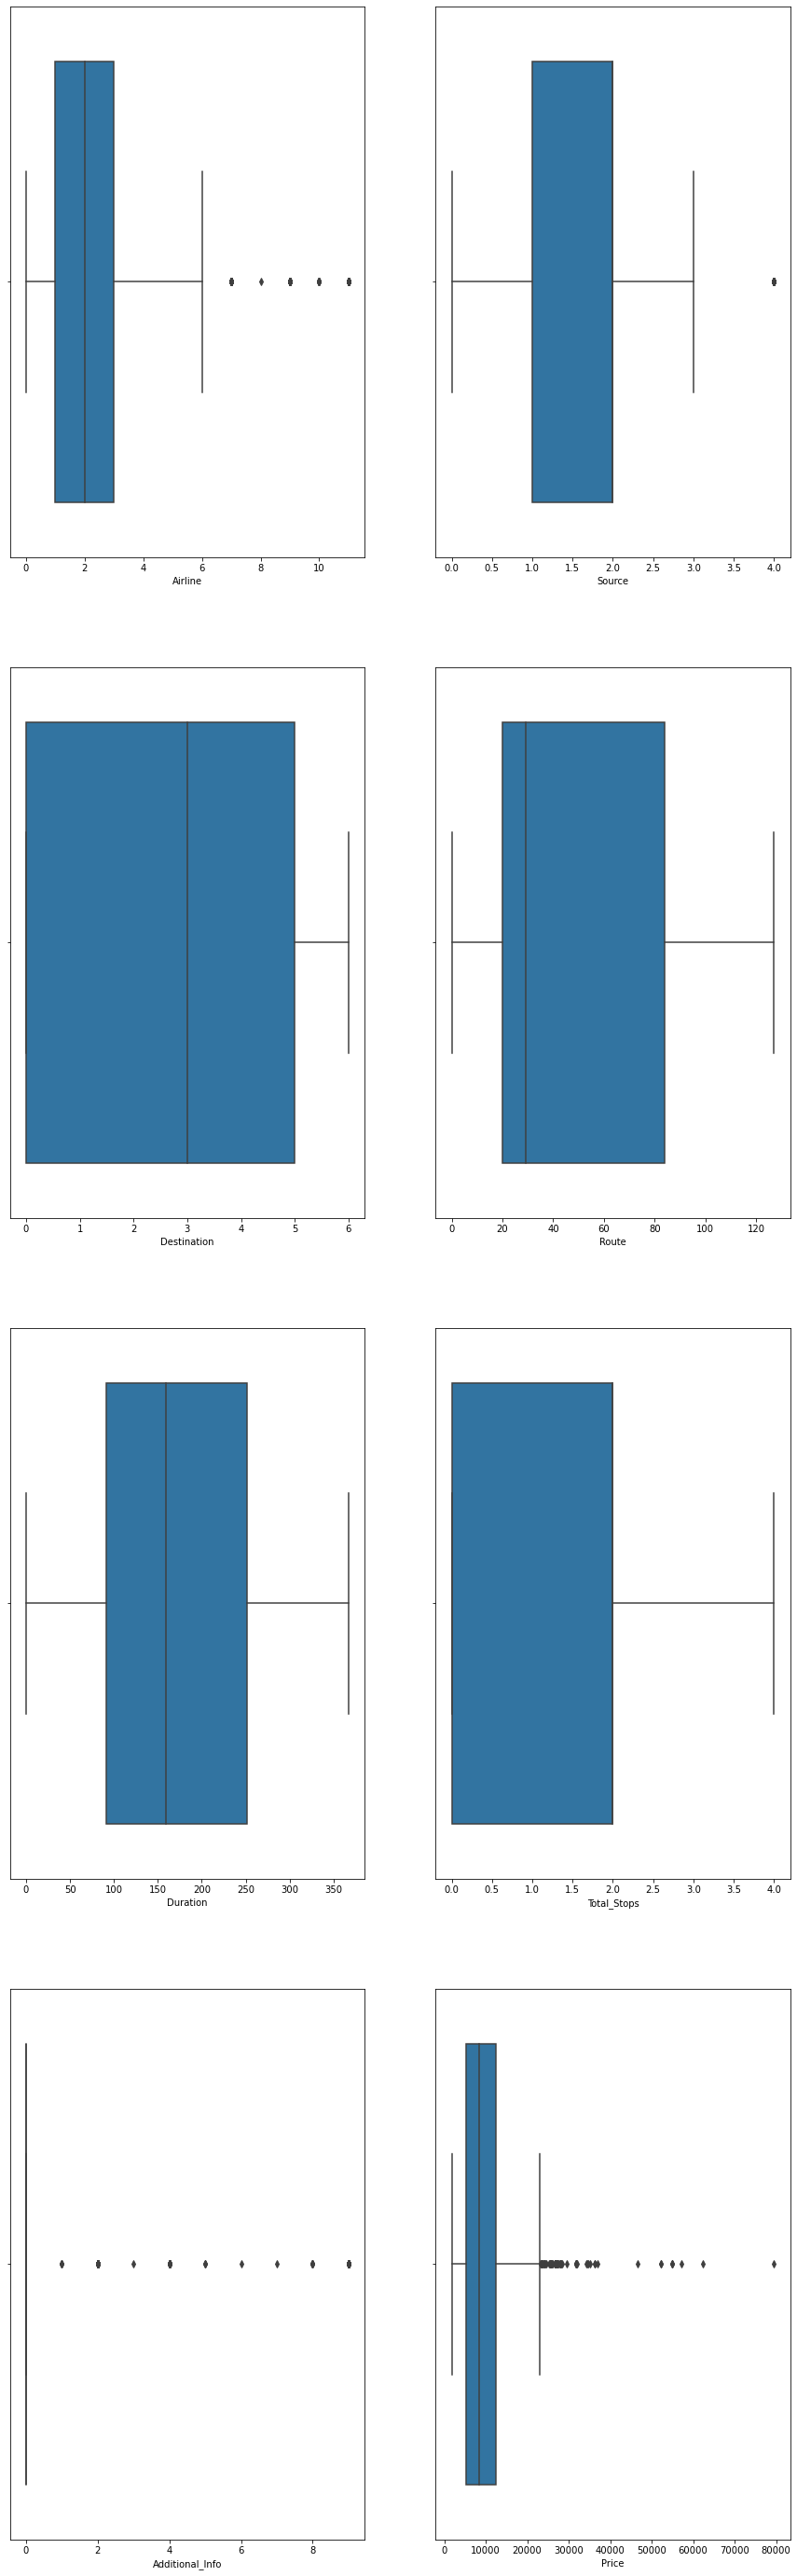

In [27]:
#Detecting Outliers  using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph <=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()    

.Outliers present in Airline,Source and Additional_Info.                      
so, first we remove outliers using IQR before moving further.                 

In [28]:
#Find the IQR

#1st quantile
q1=df.quantile(0.25)

#3rd quantile
q3=df.quantile(0.75)

#IQR
iqr=q3-q1

In [29]:
#Removing Outliers from Airplane
index=np.where(df['Airline'] > (q3.Airline +(1.5*iqr.Airline)))
df=df.drop(df.index[index])
df.reset_index()

,index,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3897
1,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,7662
2,2,2.0,2.0,5.0,2.0,2.0,1.0,0.0,13882
3,3,0.0,1.0,0.0,3.0,3.0,2.0,0.0,6218
4,4,0.0,0.0,2.0,4.0,4.0,2.0,0.0,13302
...,...,...,...,...,...,...,...,...,...
9333,10676,3.0,2.0,5.0,29.0,130.0,2.0,0.0,9794
9334,10679,1.0,1.0,0.0,112.0,240.0,0.0,0.0,4145
9335,10680,2.0,0.0,3.0,0.0,110.0,0.0,0.0,7229
9336,10681,5.0,0.0,2.0,0.0,125.0,0.0,0.0,12648


In [30]:
#Removing Outliers from Source
index=np.where(df['Source'] > (q3.Source +(1.5*iqr.Source)))
df=df.drop(df.index[index])
df.reset_index()

,index,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3897
1,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,7662
2,2,2.0,2.0,5.0,2.0,2.0,1.0,0.0,13882
3,3,0.0,1.0,0.0,3.0,3.0,2.0,0.0,6218
4,4,0.0,0.0,2.0,4.0,4.0,2.0,0.0,13302
...,...,...,...,...,...,...,...,...,...
9080,10676,3.0,2.0,5.0,29.0,130.0,2.0,0.0,9794
9081,10679,1.0,1.0,0.0,112.0,240.0,0.0,0.0,4145
9082,10680,2.0,0.0,3.0,0.0,110.0,0.0,0.0,7229
9083,10681,5.0,0.0,2.0,0.0,125.0,0.0,0.0,12648


In [31]:
#Removing Outliers from Additional_info
index=np.where(df['Additional_Info'] > (q3.Additional_Info +(1.5*iqr.Additional_Info)))
df=df.drop(df.index[index])
df.reset_index()

,index,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3897
1,1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,7662
2,2,2.0,2.0,5.0,2.0,2.0,1.0,0.0,13882
3,3,0.0,1.0,0.0,3.0,3.0,2.0,0.0,6218
4,4,0.0,0.0,2.0,4.0,4.0,2.0,0.0,13302
...,...,...,...,...,...,...,...,...,...
7064,10676,3.0,2.0,5.0,29.0,130.0,2.0,0.0,9794
7065,10679,1.0,1.0,0.0,112.0,240.0,0.0,0.0,4145
7066,10680,2.0,0.0,3.0,0.0,110.0,0.0,0.0,7229
7067,10681,5.0,0.0,2.0,0.0,125.0,0.0,0.0,12648


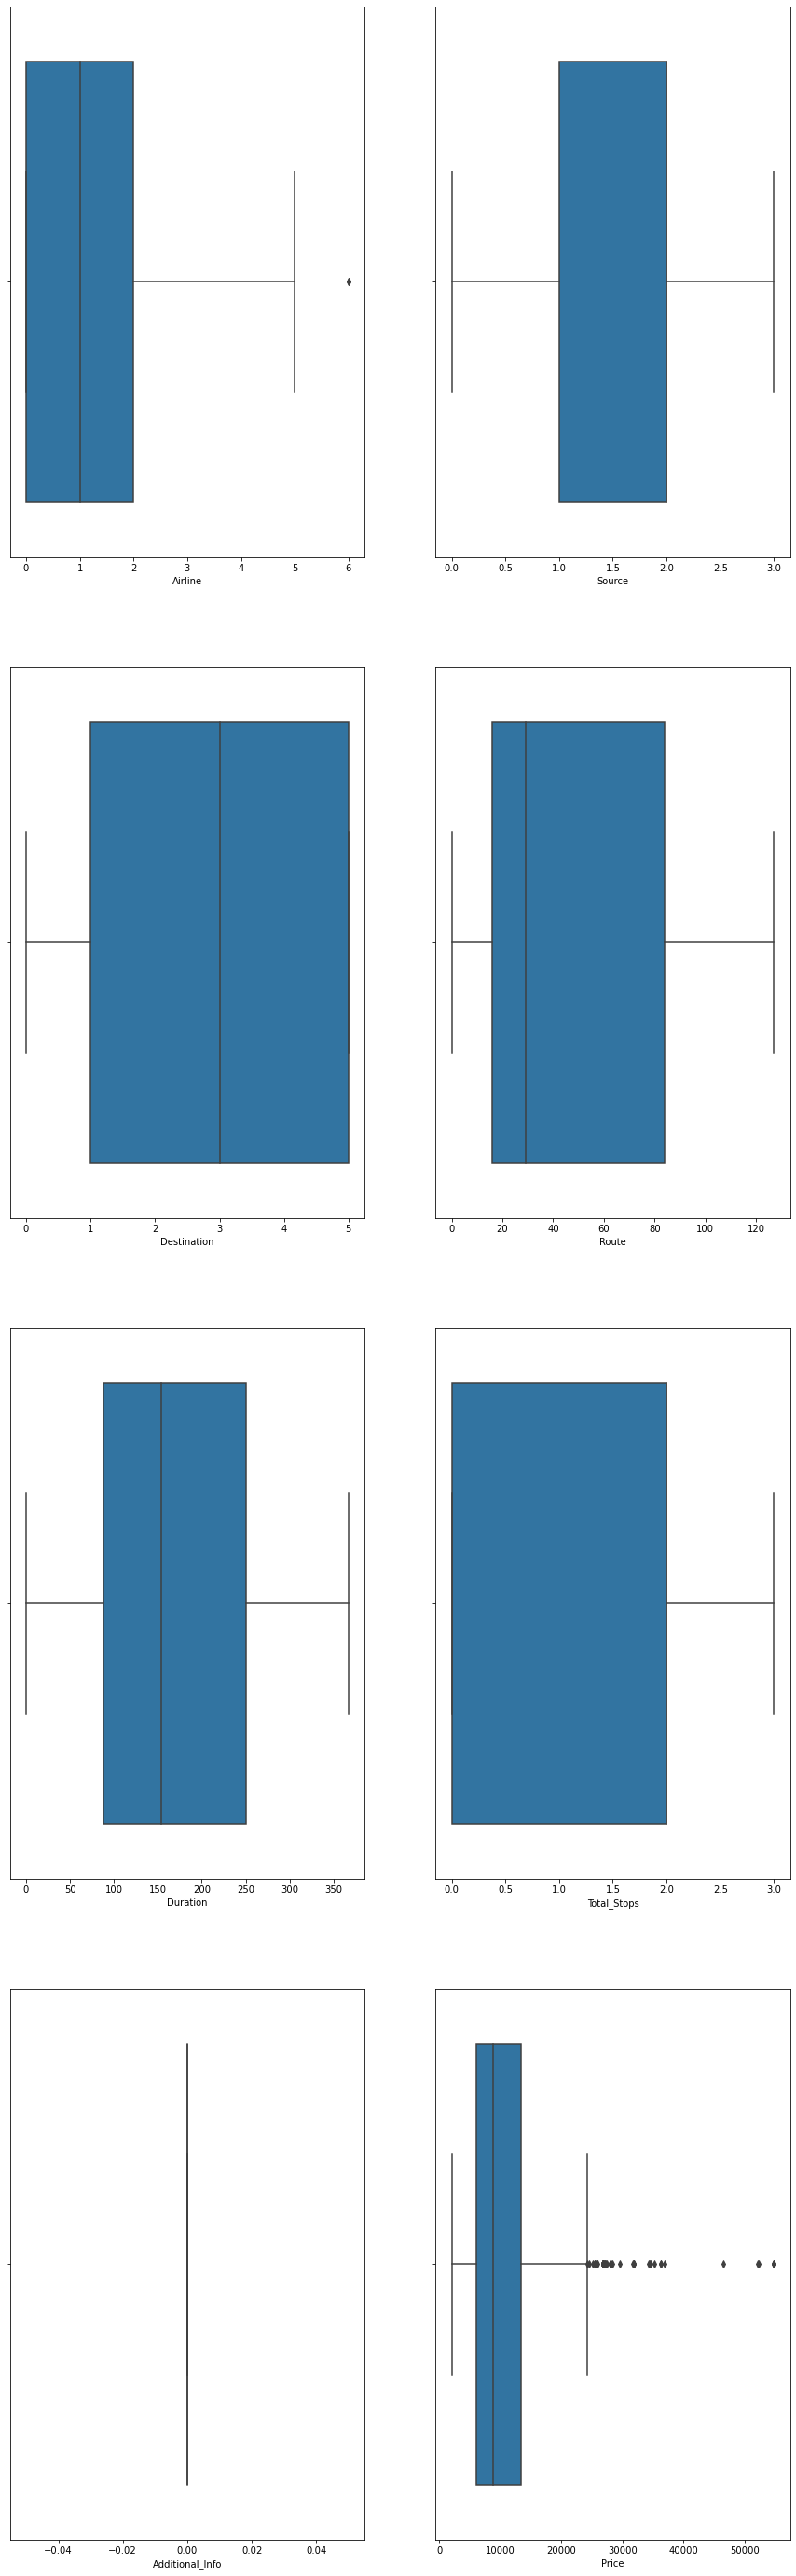

In [32]:
#Rechecking Outliers  using boxplot
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph <=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

.Now we removed outliers from the columns now we can proceed further.                  

In [33]:
#Data scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [48]:
#Importing vif to check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.163019,Airline
1,1.431756,Source
2,1.442688,Destination
3,1.353849,Route
4,1.193059,Duration
5,1.232807,Total_Stops
6,NaN,Additional_Info


.All the vif values are less then 5 and very low. That means no multicollinearity

In [34]:
#spliting data into train & test data
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=30)

In [35]:
y_train.head()

6813     12121
10086    10262
1030     14483
456       5177
1627      7452
Name: Price, dtype: int64

In [36]:
#Model instantiating &trainning
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [37]:
#To get the amount of trust that how much the given data fit to the model
#Adjusted R2 score
regression.score(x_train,y_train)

0.29717618784420996

In [38]:
regression.score(x_test,y_test)

0.31379531333746935

.I got very less percent .so trying to get good one.   

In [39]:
df.describe()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
count,7069.000000,7069.000000,7069.000000,7069.000000,7069.000000,7069.000000,7069.0,7069.000000
mean,1.572500,1.404725,2.979064,45.506861,165.547178,1.264535,0.0,9836.464281
std,1.353698,0.887654,2.124749,36.999635,105.473630,0.878379,0.0,4695.029230
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2050.000000
25%,0.000000,1.000000,1.000000,16.000000,88.000000,0.000000,0.0,6121.000000
50%,1.000000,2.000000,3.000000,29.000000,154.000000,2.000000,0.0,8891.000000
75%,2.000000,2.000000,5.000000,84.000000,250.000000,2.000000,0.0,13377.000000
max,6.000000,3.000000,5.000000,127.000000,367.000000,3.000000,0.0,54826.000000


In [40]:
#checking mean_absolute_error
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [41]:
y_pred=regression.predict(x_test)

In [42]:
mean_absolute_error(y_test,y_pred)

2762.520774114855

.Still looking problem in model .Now trying with diffrent idea.    

In [43]:
df.shape

(7069, 8)

.Trying with RandomForestRegressior to get better accuracy.                    

In [44]:
#Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price
0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3897
1,1.0,1.0,0.0,1.0,1.0,1.0,0.0,7662
2,2.0,2.0,5.0,2.0,2.0,1.0,0.0,13882
3,0.0,1.0,0.0,3.0,3.0,2.0,0.0,6218
4,0.0,0.0,2.0,4.0,4.0,2.0,0.0,13302


In [46]:
#Dividing dataset into features and label
y=df['Price']
x=df.drop(columns=['Price'])

In [47]:
#Data scaling again
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [51]:
#HyperParaMeterTunning using GridSearchCV
#RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=30)

clf=RandomForestRegressor()

params={'n_estimators':[13,15,17],
        'max_depth':[10,12,13],
        'min_samples_split':[10,11,13],
        'min_samples_leaf':[5,7,8,9]
}


grid=GridSearchCV(clf,param_grid=params)

grid.fit(x_train,y_train)

print('best_params  =  >',grid.best_params_)

best_params  =  > {'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 17}


In [52]:
clf=RandomForestRegressor(max_depth=12, min_samples_leaf=5, min_samples_split=11, n_estimators=17)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [53]:
clf.score(x_train,y_train)

0.7436020783783563

In [54]:
clf.score(x_test,y_test)

0.7064908694542296

.Hence we can increase the percent from 30 to approx 70 percent using RandomForestRegressor.                                    

In [55]:
#LassoCV
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [56]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

0.02983231516512726

In [57]:
lasso_clf=Lasso(alpha)
lasso_clf.fit(x_train,y_train)

Lasso(alpha=0.02983231516512726)

In [58]:
lasso_clf.score(x_test,y_test)

0.2877152045303757

In [59]:
# Using RidgeCV to check weather the model is overfitted or not.
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.001),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        normalize=True)

In [60]:
#Best alpha
ridgecv.alpha_

0.004

In [61]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.004)

In [62]:
ridge_model.score(x_test,y_test)

0.2877151644711299

.As  both Lasso and Ridge r2 score is same as the regression have . so,we can say that there is no overfitting.

In [63]:
#let's plot ROC AUC curve  to choose best model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import plot_roc_curve,roc_curve,roc_auc_score

In [64]:
lr=LinearRegression()
kn=KNeighborsRegressor()
clf=RandomForestRegressor()
dt=DecisionTreeRegressor()

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=30)

In [66]:
#training with all regressors
lr.fit(x_train, y_train)

LinearRegression()

In [67]:
clf.fit(x_train, y_train)

RandomForestRegressor()

In [68]:
kn.fit(x_train, y_train)

KNeighborsRegressor()

In [69]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [70]:
lr.score(x_test,y_test)

0.2877151553834648

In [71]:
dt.score(x_test,y_test)

0.6630100067440954

In [72]:
kn.score(x_test,y_test)

0.6816519832981871

In [73]:
clf.score(x_test,y_test)

0.682423587597884

In [74]:
#Saving the model
filename='finalized_model.pickle'
pickle.dump(clf,open(filename,'wb'))

.RandomForestRegressor fit 68 % which is more than other. so, we use RandomForestRegressor for this model.                  